## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

Diagnostic approach may be the right one as we can ask "Why do these people like certain wines over others?" by looking at all the features and comparing them to the quality. Diagnostic analytics examines data or content to answer "Why did it happen?".

Prescriptive approach may be the right approach as we are trying to find the features that determine the best quality. If we find a definitive response after completing the analysis, we can then "prescribe" the recipe that will generate the best wine based on the data and this in turn will create a better business model based on data.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

For more information, read [Cortez et al., 2009]. <br>
Input variables (based on physicochemical tests): <br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10) <br>

### Data Collection

**Q3. From where do we get our data?**

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

https://archive.ics.uci.edu/ml/datasets/wine+quality

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Knowing the impact of each variable can allow a business have an understanding of which variables are the most important for quality when creating a recipe for a wine. This way your wine is more likely to be liked by the public and have the statistics to back the recipe.
 <br>
 <br>
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

#### Reading Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Check Shape Of Data

In [4]:
wine_data.shape

(1599, 12)

<b>Observation:</b> The dataset is large with 1599 wines with 12 features per wine.

#### Datatypes Of Features

In [7]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<b>Observation:</b> All the features are continuous with all being floats except for quality which is an integer within the range of 0 to 10.

#### Exploring Continous Features

In [8]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<b>Observation:</b> It is interesting to see that the average quality for all the wines is a 5.636. If we are to assume that 5.0 is a passing quality, then the majority of wines have a passing quality. 

In [10]:
wine_data.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<b>Observation:</b> Based on the dataset, it states that quality is from 0-10 but suprisingly, there are integer values missing, [0,1,2,9,10]. Although the dataset is large, no wine received a quality lower than 3 or higher than 8. 

<b>Recall:</b> We want to find which qualities gives us the best quality according to the dataset.

In [11]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Here we want to look at the correlations betweem the quality and the features so lets take a look at the last column. <br>
<b>Recall</b>: We do not want the values to be close to zero. We either want a strong positve value or a strong negative value. Here we can observe no features truly have a strong positive or negative relation to quality (maybe alcohol if 0.476 is considered high or volatile acidity if -0.391 is considered high). This may mean that we may need to look deeper into the data and look for further correlations.<br>

### Data Preparation

#### Explore the dataset further
<br>
<br>
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

#### Checking For Missing Data And Handling

In [13]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<b>Observation:</b> As you can observe, there is no null, N/A values that are within the data and no handling is nessesary to replace the null values.

#### Checking For Outliers If Any And Handling

In [15]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Find Cap Outliers If Any
Want to check values above the 95th and 99th percentiles

In [17]:
def detect_outlier_cap(feature):
    outliers = []
    data = wine_data[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [18]:
# Determine what the upperbound should be for continuous features
for feat in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    detect_outlier_cap(feat)


Outlier caps for fixed acidity:
  --95p: 11.8 / 78 values exceed that
  --3sd: 13.5 / 12 values exceed that
  --99p: 13.3 / 14 values exceed that

Outlier caps for volatile acidity:
  --95p: 0.8 / 76 values exceed that
  --3sd: 1.1 / 10 values exceed that
  --99p: 1.0 / 15 values exceed that

Outlier caps for citric acid:
  --95p: 0.6 / 78 values exceed that
  --3sd: 0.9 / 1 values exceed that
  --99p: 0.7 / 16 values exceed that

Outlier caps for residual sugar:
  --95p: 5.1 / 79 values exceed that
  --3sd: 6.8 / 30 values exceed that
  --99p: 8.3 / 16 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 80 values exceed that
  --3sd: 0.2 / 31 values exceed that
  --99p: 0.4 / 16 values exceed that

Outlier caps for free sulfur dioxide:
  --95p: 35.0 / 77 values exceed that
  --3sd: 47.2 / 22 values exceed that
  --99p: 50.0 / 16 values exceed that

Outlier caps for total sulfur dioxide:
  --95p: 112.1 / 80 values exceed that
  --3sd: 145.1 / 15 values exceed that
  --99p: 

#### Find Floor Outliers If Any
Find ouliers in the 5th and 1th percentile

In [25]:
def detect_outlier_floor(feature):
    outliers = []
    data = wine_data[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) < -3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.05),
                                                             len([i for i in data
                                                                  if i < data.quantile(.05)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.01),
                                                           len([i for i in data
                                                                if i < data.quantile(.01)])))

In [21]:
for feat in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    detect_outlier_floor(feat)


Outlier caps for fixed acidity:
  --95p: 6.1 / 71 values exceed that
  --3sd: 13.5 / 0 values exceed that
  --99p: 5.2 / 13 values exceed that

Outlier caps for volatile acidity:
  --95p: 0.3 / 73 values exceed that
  --3sd: 1.1 / 0 values exceed that
  --99p: 0.2 / 15 values exceed that

Outlier caps for citric acid:
  --95p: 0.0 / 0 values exceed that
  --3sd: 0.9 / 0 values exceed that
  --99p: 0.0 / 0 values exceed that

Outlier caps for residual sugar:
  --95p: 1.6 / 80 values exceed that
  --3sd: 6.8 / 0 values exceed that
  --99p: 1.4 / 15 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 78 values exceed that
  --3sd: 0.2 / 0 values exceed that
  --99p: 0.0 / 16 values exceed that

Outlier caps for free sulfur dioxide:
  --95p: 4.0 / 53 values exceed that
  --3sd: 47.2 / 0 values exceed that
  --99p: 3.0 / 4 values exceed that

Outlier caps for total sulfur dioxide:
  --95p: 11.0 / 62 values exceed that
  --3sd: 145.1 / 0 values exceed that
  --99p: 8.0 / 7 values

<b>Observation:</b> It appears that the dataset does not need to be clipped. For the values found in the 99th percentile and 1th percentile, the values ranged from 7-16 which is around 1% of the data (1599 rows). This is reasonable and therefore will be considered within the dataset. Also for the 5th and 95th percentile, it appears that is contains 60-80 values which is again reasonable as it is around 5% of the data. 

#### Correlation heatmap

<AxesSubplot:>

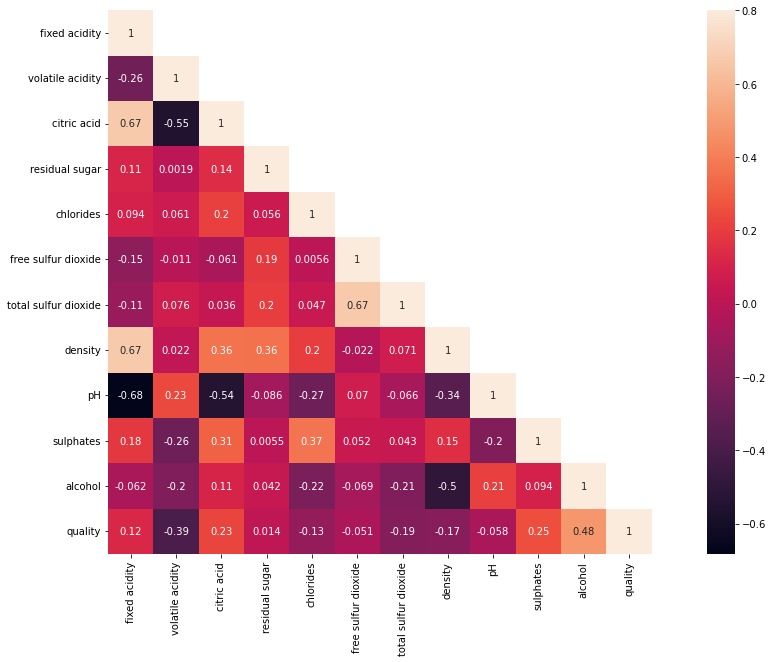

In [24]:
corrMatt = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<b>Observation:</b> This is the same as the correlation done earlier but with colours indicating the correlations amoungst each other.<br>
<br>
<b>Recall</b>: We do not want the values to be close to zero. We either want a strong positve value or a strong negative value. Here we can observe no features truly have a strong positive or negative relation to quality (maybe alcohol if 0.476 is considered high or volatile acidity if -0.391 is considered high). This may mean that we may need to look deeper into the data and look for further correlations.<br>

#### The Distribution Of Data Using Histograms/KDE

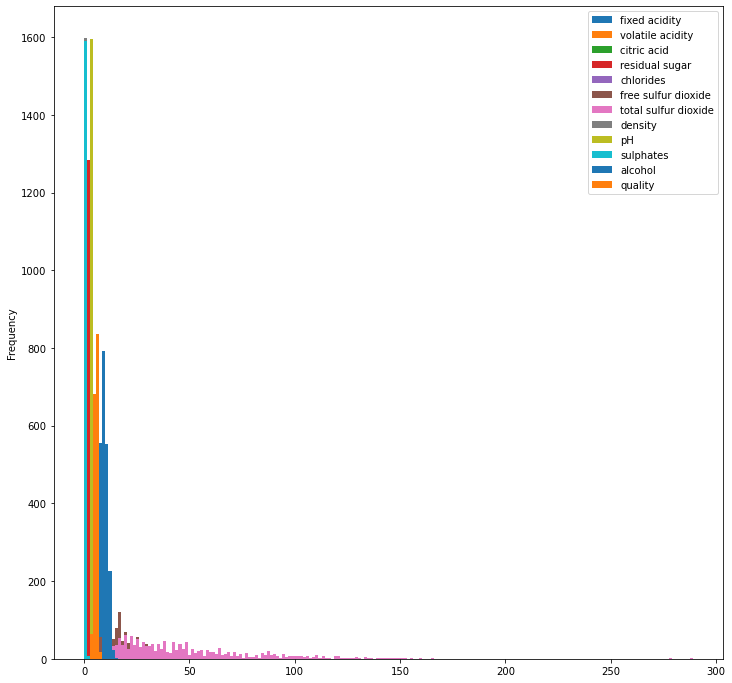

In [43]:
pd.DataFrame(wine_data).plot(kind='hist',figsize = (12,12), bins=200);

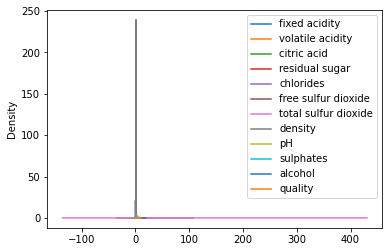

In [47]:
pd.DataFrame(wine_data).plot(kind='kde');

<b>Observation:</b> It is quite difficult to observe the histogram at a detailed view because the transparency is between the distributions is opaque. ASIDE: when made transparent, the graph became harder to read. Although we can see the peaks of the data is squeezed within 0-50. 

### Scaling The Data
This will be done to prepare the data for modelling

Here we will use scalers from Scikei-learn to make the data better regularized to allow the models to perform the best.

Lets view the data without any scaling

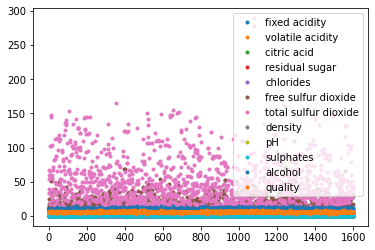

In [33]:
wine_data.plot(style='.');

The data is somewhat readable, clear patterns exist with sulphates, volatile acidity and alcohol.

<b>Recall:</b> We already checked for outliers and saw that the data was stable. In this case the scaler used will not be sensitive to unknown outliers. 

We need to check of the data follows a normal/Gaussian distribution before we proceed.

#### StandardScaler
Here we will implement the StandardScaler from sklearn

In [34]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(wine_data)
scaled1[:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711, -0.78782264],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711,  0.45084835],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611, -0.78782264]])

#### KDE

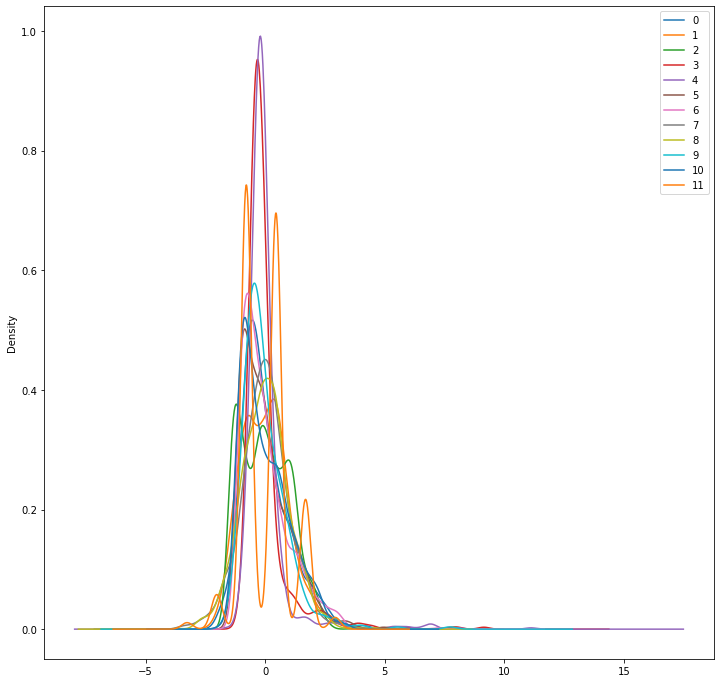

In [36]:
pd.DataFrame(scaled1).plot(kind = 'kde',figsize=(12,12));

#### Histogram

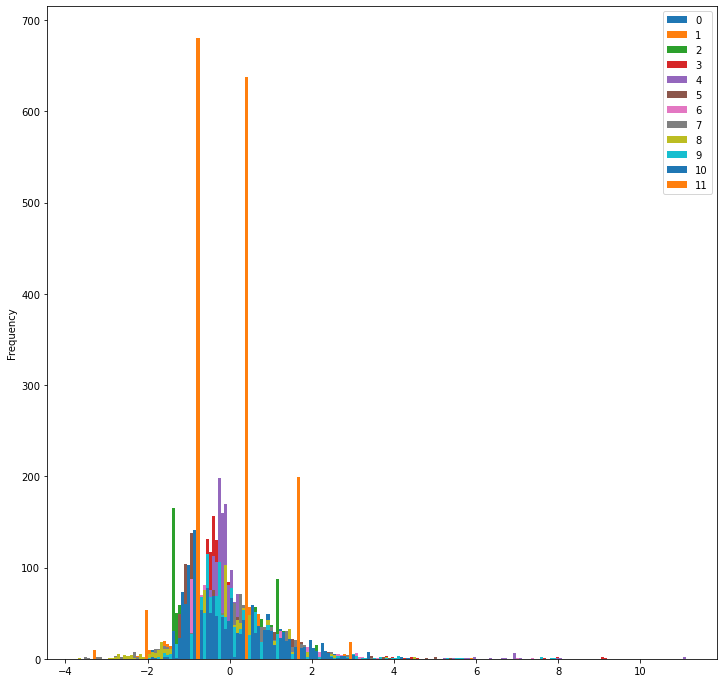

In [44]:
pd.DataFrame(scaled1).plot(kind='hist', figsize=(12,12), bins=200);

#### MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaled2 = MinMaxScaler().fit_transform(wine_data)
scaled2[:5]

array([[0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615, 0.4       ],
       [0.28318584, 0.52054795, 0.        , 0.11643836, 0.14357262,
        0.33802817, 0.2155477 , 0.49412628, 0.36220472, 0.20958084,
        0.21538462, 0.4       ],
       [0.28318584, 0.43835616, 0.04      , 0.09589041, 0.13355593,
        0.1971831 , 0.16961131, 0.50881057, 0.40944882, 0.19161677,
        0.21538462, 0.4       ],
       [0.5840708 , 0.10958904, 0.56      , 0.06849315, 0.10517529,
        0.22535211, 0.19081272, 0.58223201, 0.33070866, 0.1497006 ,
        0.21538462, 0.6       ],
       [0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615, 0.4       ]])

#### KDE

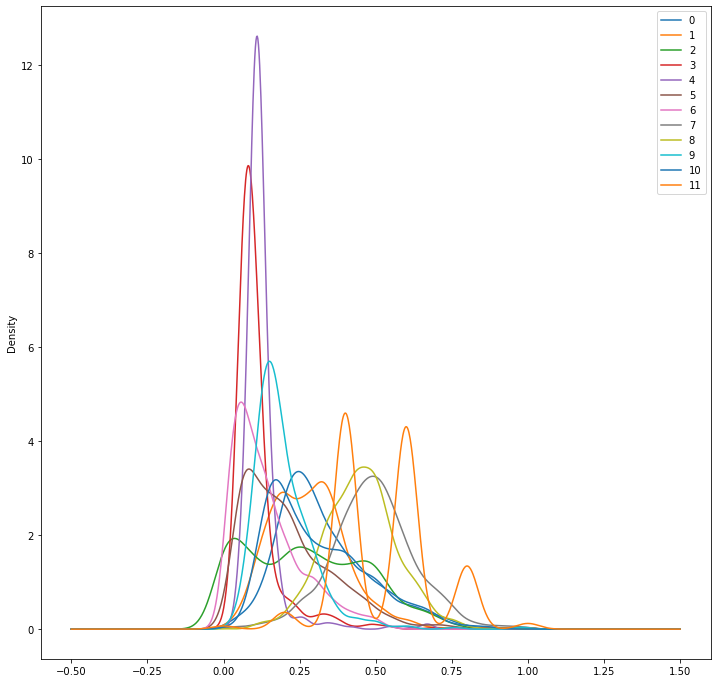

In [39]:
pd.DataFrame(scaled2).plot(kind = 'kde',figsize=(12,12));

#### Histogram

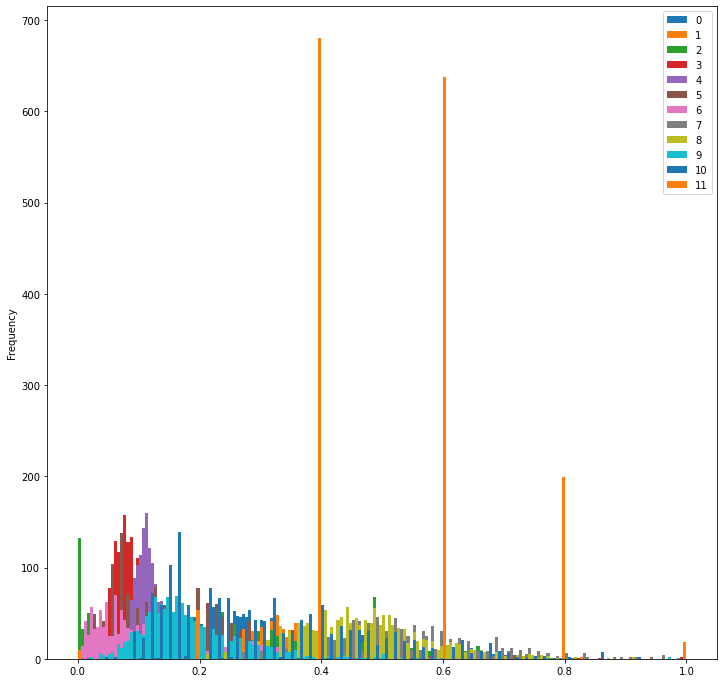

In [40]:
pd.DataFrame(scaled2).plot(kind='hist', figsize=(12,12), bins=200);

REVIEW: MinMaxScaler is more of a normalizer whereas the StandardScaler is used for standardization. As we work through the modelling, we will see which scaler is best fit if needed. Recall, there are going to be different types of models, regression models and a neural network.

It appears that the data does follow a normal distribution. 

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

#### Multivariable Linear Regression using any 2 Regression algorithms

##### Algorithm 1: Multiple Regression Using linear_model From sklearn
Code snippets taken from https://towardsdatascience.com/multiple-regression-as-a-machine-learning-algorithm-a98a6b9f307b

In [184]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [185]:
# select data subset
df = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']]# select data for modeling
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [186]:
# split data into train and test
# we are using a 70:30 split for the regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [187]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1468,7.3,0.48,0.32,2.10,0.062,31.0,54.0,0.99728,3.30,0.65,10.0
495,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
1325,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
514,10.5,0.51,0.64,2.40,0.107,6.0,15.0,0.99730,3.09,0.66,11.8


In [188]:
# instantiate 
modelLR = linear_model.LinearRegression()
# fit
modelLR.fit(X_train, y_train)
# predict
y_predLR = model.predict(X_test)

In [189]:
# model evaluation
scoreLR1 = r2_score(y_test, y_pred)
print(score)# score

0.3513885332517388


<b>Observation:</b> As you can see, this multivariable regression model has a low score of 0.35. ASIDE: Providing a normalized dataset could improve performance.

##### Algorithm 2: Multiple Regression Using Statsmodels
Code snippets taken from https://www.datarobot.com/blog/multiple-regression-using-statsmodels/

In [190]:
import statsmodels.api as sm


In [191]:
## fit a OLS model with intercept on TV and Radio 
X1 = sm.add_constant(X) 
est = sm.OLS(y, X1).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.79e-145
Time:                        23:24:01   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Observation:</b> As you can see with model, the r2 score is 0.361, similar to algorithm 1. ASIDE: Providing a normalized dataset could improve performance.

#### Neural Network Implementation

In [192]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [198]:
#99/1 split for NN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 42)

In [199]:
from sklearn.preprocessing import MinMaxScaler
scaled_X_train = MinMaxScaler().fit_transform(X_train)
scaled_X_test = MinMaxScaler().fit_transform(X_test)

In [200]:
scaled_X_train.shape

(1583, 11)

In [201]:
scaled_X_test.shape

(16, 11)

In [202]:
model_neural = Sequential([
  #Flatten(input_shape=(11)),
  Dense(512, activation=tf.nn.relu),
  Dense(200, activation=tf.nn.relu),
  Dense(100, activation=tf.nn.relu),
  Dense(10, activation=tf.nn.softmax)
])

In [203]:
model_neural.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [204]:
model_neural.fit(scaled_X_train, y_train, epochs=1)

50/50 [==============================] - 1s 3ms/step - loss: 1.3820 - accuracy: 0.4700


In [205]:
model_neural.evaluate(scaled_X_test, y_test)

1/1 [==============================] - 0s 188ms/step - loss: 1.3071 - accuracy: 0.5625


[1.3070738315582275, 0.5625]

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

### Model Evaluation For Regression Models

Algorithm 1

In [208]:
scoreLR1 #Score calculated from before

0.3513885332517388

#### Calculate the feature importance scores for the top features that help predicting wine quality and visualize them
Code snippet taken from https://machinelearningmastery.com/calculate-feature-importance-with-python/

1.0.2
Feature: 0, Score: 0.03697
Feature: 1, Score: 0.11892
Feature: 2, Score: 0.04136
Feature: 3, Score: 0.05506
Feature: 4, Score: 0.03659
Feature: 5, Score: 0.05321
Feature: 6, Score: 0.07146
Feature: 7, Score: 0.05373
Feature: 8, Score: 0.07774
Feature: 9, Score: 0.16135
Feature: 10, Score: 0.29362


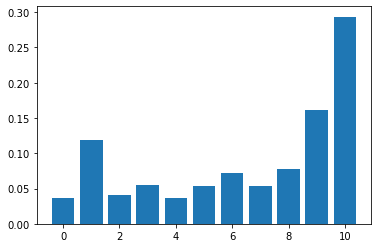

In [182]:
import sklearn
print(sklearn.__version__)

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<b>Feature 10 = Alcohol <br>
Feature 9 = Sulphates <br>
Feature 1 = Volatile acidity <br></b>
<br>
<br>
The 3 most important features are Alcohol, Sulphates, Volatile acidity

### Model Evaluation For Classification Model

#### Plot training accuracy and validation accuracy 
Taken from https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

Epoch 1/50
392/392 [==============================] - 1s 3ms/step - loss: 1.0499 - accuracy: 0.5641 - val_loss: 1.2116 - val_accuracy: 0.5625
Epoch 2/50
392/392 [==============================] - 1s 3ms/step - loss: 0.9989 - accuracy: 0.5814 - val_loss: 1.1101 - val_accuracy: 0.5625
Epoch 3/50
392/392 [==============================] - 1s 3ms/step - loss: 0.9813 - accuracy: 0.5839 - val_loss: 0.9744 - val_accuracy: 0.6875
Epoch 4/50
392/392 [==============================] - 1s 2ms/step - loss: 0.9656 - accuracy: 0.5788 - val_loss: 0.9338 - val_accuracy: 0.6875
Epoch 5/50
392/392 [==============================] - 1s 2ms/step - loss: 0.9463 - accuracy: 0.5795 - val_loss: 1.1310 - val_accuracy: 0.6875
Epoch 6/50
392/392 [==============================] - 1s 3ms/step - loss: 0.9476 - accuracy: 0.5839 - val_loss: 0.9136 - val_accuracy: 0.6875
Epoch 7/50
392/392 [==============================] - 1s 3ms/step - loss: 0.9404 - accuracy: 0.5833 - val_loss: 0.8372 - val_accuracy: 0.8125
Epoch 

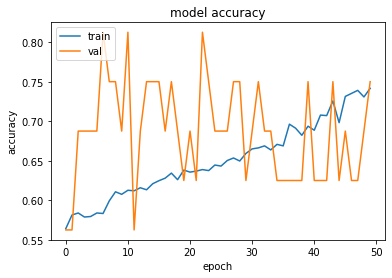

In [206]:
import keras
from matplotlib import pyplot as plt
history = model_neural.fit(scaled_X_train, y_train,validation_split = 0.01, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Taken from https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracys

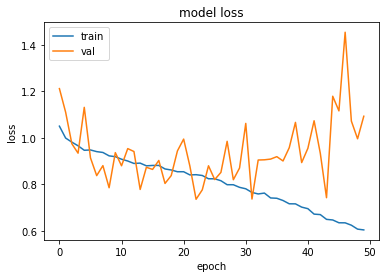

In [207]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Conclusion

The neural network has much better accuracy scores when compared to the multivariable regression models. This is most likely due to the fact that the neural network having a greater training size, although at the cost of time because the neural network takes much longer to process compared to the regression models. 